## TensorFlowでIris問題を解く

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras  
import tensorflow as tf

### Iris問題を解いてみる
petal : 花弁  
sepal : がく片

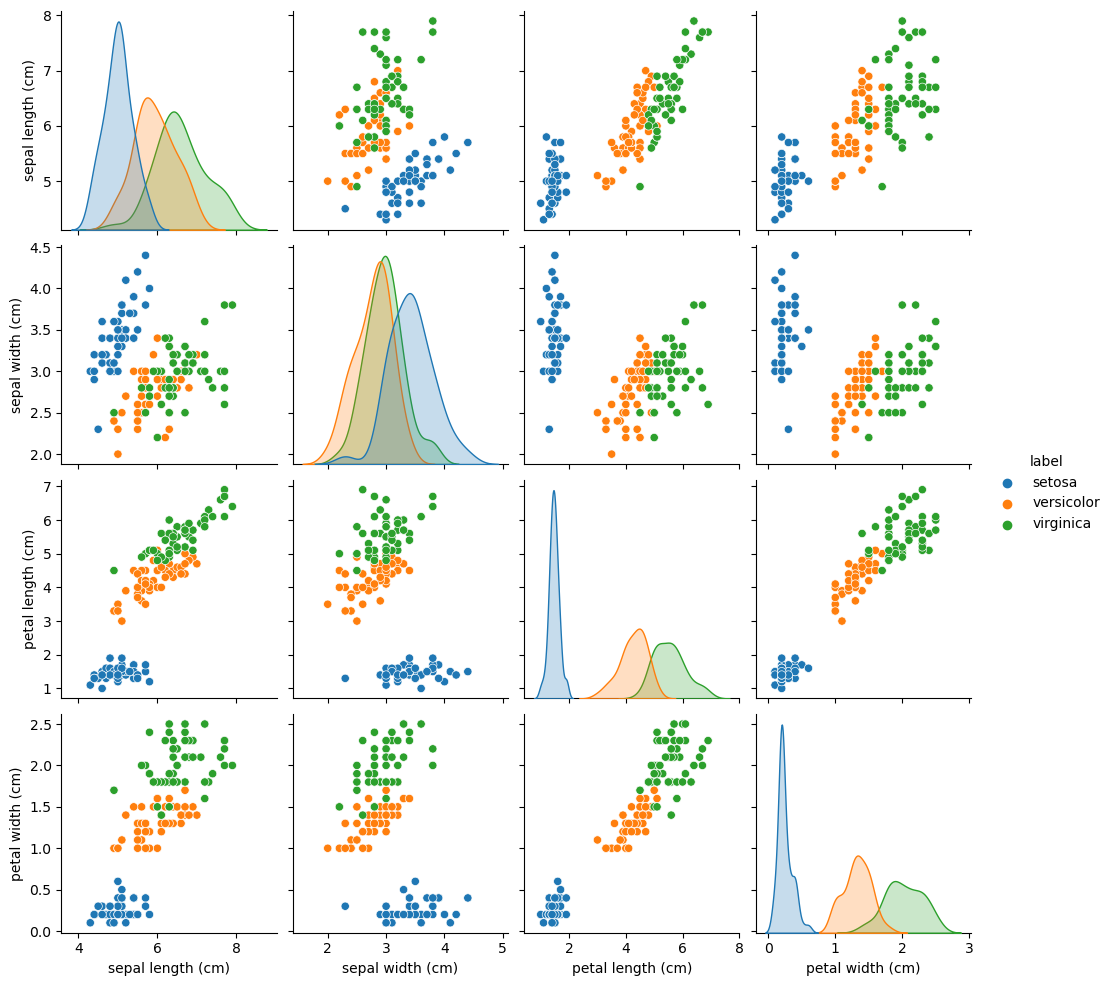

In [2]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
sns.pairplot(df_iris, hue="label")

In [3]:
# データの準備
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# one-hotベクトルに変換
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X_train=",X_train)
print()
print("X_test=",X_test)
print()
print("y_train=",y_train)
print()
print("y_test=",y_test)

X_train= [[4.9 3.1 1.5 0.1]
 [5.8 2.8 5.1 2.4]
 [6.7 3.  5.2 2.3]
 [7.7 3.  6.1 2.3]
 [6.7 3.1 5.6 2.4]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.2 2. ]
 [7.6 3.  6.6 2.1]
 [6.2 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.6 2.9 4.6 1.3]
 [5.1 3.5 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [5.7 2.5 5.  2. ]
 [6.5 3.2 5.1 2. ]
 [5.1 3.7 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [6.3 2.5 5.  1.9]
 [6.  2.2 4.  1. ]
 [6.1 2.6 5.6 1.4]
 [6.7 3.3 5.7 2.5]
 [5.7 2.8 4.5 1.3]
 [5.  3.6 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [5.4 3.7 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [5.7 4.4 1.5 0.4]
 [6.  2.9 4.5 1.5]
 [5.6 3.  4.1 1.3]
 [5.4 3.9 1.7 0.4]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [6.2 3.4 5.4 2.3]
 [6.4 2.8 5.6 2.2]
 [6.  3.  4.8 1.8]
 [6.  3.4 4.5 1.6]
 [5.7 3.8 1.7 0.3]
 [5.  3.3 1.4 0.2]
 [5.9 3.  5.1 1.8]
 [6.  2.7 5.1 1.6]
 [5.5 2.6 4.4 1.2]
 [5.1 3.8 1.9 0.4]
 [6.7 3.1 4.7 1.5]
 [6.5 3.  5.8 2.2]
 [5.9 3.2 4.8 1.8]
 [6.3 3.3 4.7 1.6]
 [6.3 2.5 4.9 1.5]
 [4

### TensorFlowで解く

In [21]:
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=4))
model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(3, activation='softmax'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
# sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
adam = Adam(learning_rate=0.01)
# -----------------------------

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# WARNINGが出るが気にしなくて良い

Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 2.5189 - accuracy: 0.3238 - val_loss: 1.3503 - val_accuracy: 0.3556
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.2353 - accuracy: 0.2952 - val_loss: 1.0712 - val_accuracy: 0.3778
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.3143 - val_loss: 0.9963 - val_accuracy: 0.1333
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.9363 - accuracy: 0.3619 - val_loss: 0.9198 - val_accuracy: 0.5556
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.8359 - accuracy: 0.6762 - val_loss: 0.8459 - val_accuracy: 0.6222
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.7553 - accuracy: 0.6857 - val_loss: 0.7597 - val_accuracy: 0.6222
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.6857 - val_loss: 0.6766 - val_accuracy: 0.6222
Epoch 8/50
6/6 [================

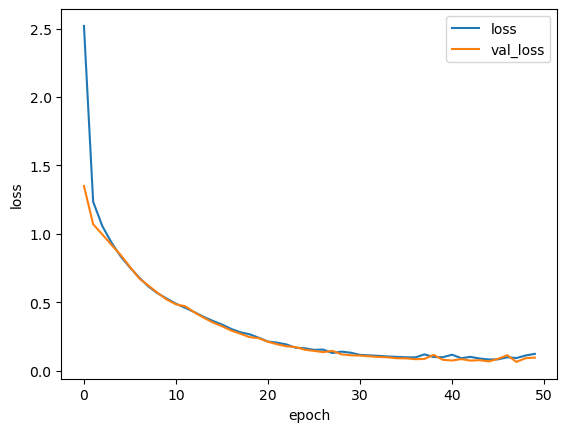

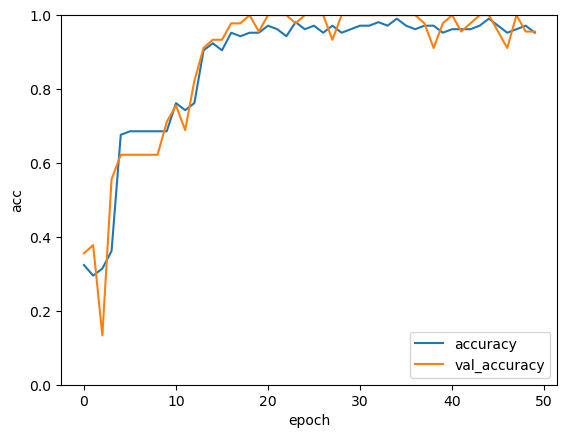

In [22]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=50,
          batch_size=20,validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["accuracy", "val_accuracy"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()


### [演習]
* epochを変更してみましょう
* batchサイズを変更してみましょう
* activationを変更してみましょう
* 層数を変更してみましょう
* 各層のノード数を変更してみましょう
* 学習率を変更してみましょう
* 学習率の最適化手法を変更してみましょう

### 計算結果の重みを表示する

In [16]:
weights = model.get_weights()
for i in range(len(weights)):
    print("weights[%s]="%i)
    print(weights[i])
    print("num:",weights[i].flatten().shape[0])
    print()

weights[0]=
[[-5.04889667e-01 -6.08480811e-01  1.32708108e+00 -6.31632458e-04
   6.80078804e-01 -7.52339482e-01]
 [-3.17697376e-02 -6.93010807e-01  1.73617029e+00  1.03813976e-01
   7.60608494e-01  1.10234581e-01]
 [ 5.14514185e-02  2.91168690e-01 -2.12035489e+00 -3.82207572e-01
  -1.88305950e+00  2.25347459e-01]
 [-4.95762944e-01  1.24925792e-01 -2.38180494e+00  7.56539172e-03
  -1.96862793e+00  2.02066243e-01]]
num: 24

weights[1]=
[-0.08949734  0.          1.5141511  -0.00168943  0.74232227 -0.04638141]
num: 6

weights[2]=
[[ 0.05768431 -0.6075222  -0.10240377  0.22474344 -0.00239644]
 [-0.57907444  0.64299864  0.35196108  0.15366971  0.69145924]
 [-0.21282393  0.03866955  1.5399964  -0.508454   -0.0893461 ]
 [ 0.23929778  0.39522797 -0.71582425  0.04869562  0.2535119 ]
 [ 0.58530444  0.04953329  1.2877316  -0.00998531 -0.1786023 ]
 [ 0.29798862 -0.1766522   0.54887885  0.08346712  0.12162151]]
num: 30

weights[3]=
[ 0.09422831  1.72554     0.07391736 -0.15101321  2.0720582 ]
num: 5

### [問]
* 重みは全部でいくつありますか？

### モデルの保存方法

In [17]:
from tensorflow.compat.v1.keras.models import load_model

# 保存
model.save('my_model.h5')
del model

# 読み込み
model = load_model('my_model.h5')

# WARNINGが出るが気にしなくて良い

### 予測

In [18]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

2/2 [==============================] - 0s 1ms/step


array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       2])